In [81]:
import pandas as pd
data=pd.read_csv('heart1.csv')
data.head()
aggregate_orig = data.groupby('num')['age'].agg('count')

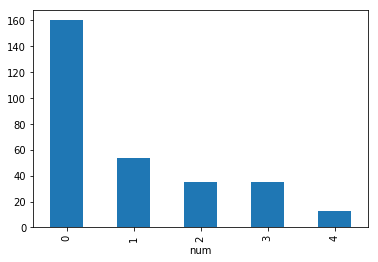

In [82]:
aggregate_orig.plot(kind='bar')

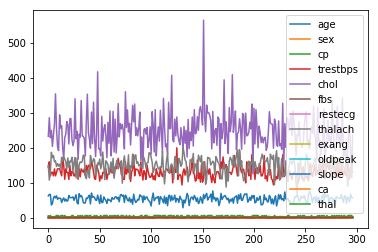

In [94]:
plt.plot(data)
plt.legend(["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal"])
fig = plt.figure(figsize=(80, 60))


In [83]:
data['num'] = data['num'].replace([1, 2, 3, 4, 5, 6], 1)
aggregation = data.groupby('num')['age'].count()
aggregation

num
0    160
1    137
Name: age, dtype: int64

In [61]:
from matplotlib import pyplot as plt
%matplotlib inline

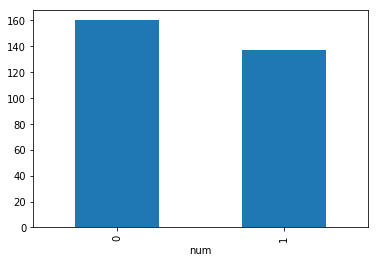

In [84]:
aggregation.plot(kind='bar')

In [97]:
def normalize(data, toNormalize): #normalizes 
    result = data.copy()
    for item in data.columns:
        if (item in toNormalize):
            max_value = data[item].max()
            min_value = data[item].min()
            result[item] = (data[item] - min_value) / (max_value - min_value)
    return result

In [99]:
toNormalize = ['age', 'cp', 'trestbps', 'chol', 'thalach', 'oldpeak']

for item in data: #converts everything to floats
    data[item] = pd.to_numeric(data[item])
    
normalized_data = normalize(data, toNormalize)

In [102]:
normalized_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.708333,1,0.000000,0.481132,0.244292,1,2,0.603053,0,0.370968,3,0,6,0
1,0.791667,1,1.000000,0.622642,0.365297,0,2,0.282443,1,0.241935,2,3,3,1
2,0.791667,1,1.000000,0.245283,0.235160,0,2,0.442748,1,0.419355,2,2,7,1
3,0.166667,1,0.666667,0.339623,0.283105,0,0,0.885496,0,0.564516,3,0,3,0
4,0.250000,0,0.333333,0.339623,0.178082,0,2,0.770992,0,0.225806,1,0,3,0


In [103]:
from sklearn import datasets, linear_model, model_selection, svm
from sklearn.ensemble import RandomForestClassifier

In [122]:
X = normalized_data[["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal"]]
y= normalized_data['num']
X.shape, y.shape

((297, 13), (297,))

In [123]:
#splitting dataset into train and test
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(237, 13) (237,)
(60, 13) (60,)


In [124]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [126]:
model.score(X_test, y_test)

0.36009092450054803

In [127]:
clf = RandomForestClassifier(n_estimators=10,n_jobs=-1, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [129]:
clf.predict(X_test)

array([1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1])

In [131]:
clf.predict_proba(X_test)[0:10]

array([[ 0.1,  0.9],
       [ 0.8,  0.2],
       [ 0.4,  0.6],
       [ 0.9,  0.1],
       [ 1. ,  0. ],
       [ 1. ,  0. ],
       [ 0.3,  0.7],
       [ 0. ,  1. ],
       [ 0.6,  0.4],
       [ 0.2,  0.8]])

In [133]:
preds = clf.predict(X_test)

In [143]:
pd.crosstab(y_test, preds, rownames=['Actual heart disease'], colnames=['Predicted heart disease'])

Predicted heart disease,0,1
Actual heart disease,,
0,23,10
1,7,20


In [141]:
clf.score(X_test, y_test)

0.71666666666666667